In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
from pandas_profiling import ProfileReport as pr
from mlxtend.preprocessing import TransactionEncoder
import re

In [2]:
df = pd.read_excel("Train.xlsx")
df

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes
...,...,...,...,...,...,...,...,...,...
11089,ID_8067,"BTM Layout 1, Electronic City","Tibetan, Chinese, Continental, Momos",₹250,₹50,4.2,326,189,30 minutes
11090,ID_4620,"Sector 14, Noida",Fast Food,₹100,₹50,3.6,36,16,30 minutes
11091,ID_3392,Majestic,"South Indian, Chinese, North Indian",₹100,₹50,3.5,45,18,30 minutes
11092,ID_4115,"Sector 3, Marathalli",North Indian,₹100,₹50,3.1,24,9,30 minutes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     11094 non-null  object
 1   Location       11094 non-null  object
 2   Cuisines       11094 non-null  object
 3   Average_Cost   11094 non-null  object
 4   Minimum_Order  11094 non-null  object
 5   Rating         11094 non-null  object
 6   Votes          11094 non-null  object
 7   Reviews        11094 non-null  object
 8   Delivery_Time  11094 non-null  object
dtypes: object(9)
memory usage: 780.2+ KB


In [4]:
round(df.isna().sum() * 100 / len(df) , 2).sort_values(ascending = False)

Restaurant       0.0
Location         0.0
Cuisines         0.0
Average_Cost     0.0
Minimum_Order    0.0
Rating           0.0
Votes            0.0
Reviews          0.0
Delivery_Time    0.0
dtype: float64

In [5]:
tt = pd.read_excel("Test.xlsx")
tt.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [6]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     2774 non-null   object
 1   Location       2774 non-null   object
 2   Cuisines       2774 non-null   object
 3   Average_Cost   2774 non-null   object
 4   Minimum_Order  2774 non-null   object
 5   Rating         2774 non-null   object
 6   Votes          2774 non-null   object
 7   Reviews        2774 non-null   object
dtypes: object(8)
memory usage: 173.5+ KB


In [7]:
round(tt.isna().sum() * 100 / len(tt) , 2).sort_values(ascending = False)

Restaurant       0.0
Location         0.0
Cuisines         0.0
Average_Cost     0.0
Minimum_Order    0.0
Rating           0.0
Votes            0.0
Reviews          0.0
dtype: float64

In [8]:
pr(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df["Delivery_Time"].value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

In [9]:
df.loc[df["Delivery_Time"] == "10 minutes"]

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
252,ID_3209,"Sector 1, Noida","Fast Food, Healthy Food",₹100,₹50,NEW,-,-,10 minutes
1773,ID_378,"D-Block, Sector 63, Noida","Biryani, North Indian, South Indian, Fast Food",₹150,₹50,NEW,-,-,10 minutes
5488,ID_5662,"Sector 14, Noida","North Indian, Chinese",₹150,₹50,3.7,53,41,10 minutes
6633,ID_5662,"Sector 1, Noida","North Indian, Chinese",₹150,₹50,3.7,53,41,10 minutes


In [10]:
df.drop(df.loc[df["Delivery_Time"] == "10 minutes"].index , inplace = True)
df.reset_index(drop = True , inplace = True)

In [11]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [12]:
cats = df.select_dtypes(include = ["object"]).columns.tolist()
cats

['Restaurant',
 'Location',
 'Cuisines',
 'Average_Cost',
 'Minimum_Order',
 'Rating',
 'Votes',
 'Reviews',
 'Delivery_Time']

The number of unique values in Restaurant column is/are : 7477


The unique values in Restaurant column is/are : ['ID_6321' 'ID_2882' 'ID_1595' ... 'ID_3392' 'ID_4115' 'ID_4417']


The number of missing values are : 0 and the percentage of 0.0 %


The value counts for each value in Restaurant column is/are :  
ID_7184    22
ID_4625    20
ID_7295    20
ID_5321    19
ID_5538    19
           ..
ID_5379     1
ID_120      1
ID_5853     1
ID_8038     1
ID_2984     1
Name: Restaurant, Length: 7477, dtype: int64



****************************************************************************************************



The number of unique values in Location column is/are : 35


The unique values in Location column is/are : ['FTI College, Law College Road, Pune' 'Sector 3, Marathalli'
 'Mumbai Central' 'Sector 1, Noida' 'Rmz Centennial, I Gate, Whitefield'
 'Delhi University-GTB Nagar' 'Yerawada, Pune, Maharashtra'
 'Delhi Administration Flats, Timarpur' 'Moulali, Kolkata'
 'Dockyard Road, Mumb

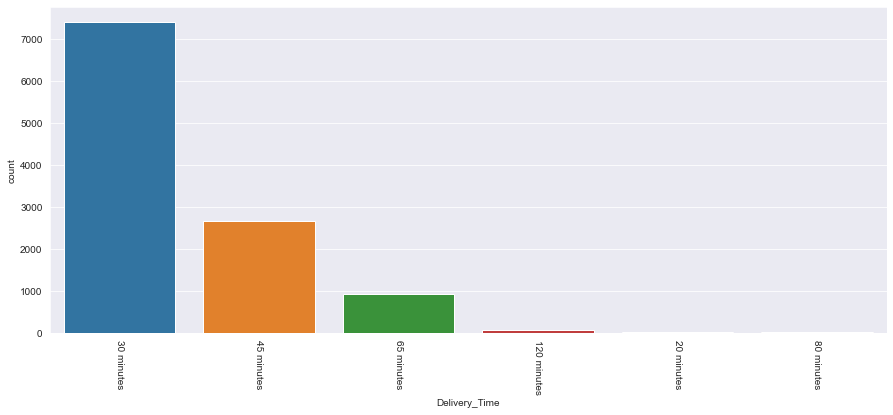

****************************************************************************************************





In [13]:
for i in cats:
    print(f"The number of unique values in {i} column is/are : {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are : {df[i].unique()}")
    print("\n")
    print(f"The number of missing values are : {df[i].isna().sum()} and the percentage of {df[i].isna().sum() * 100 / len(df)} %")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    if len(df[i].unique()) < 12 :
        plt.figure(figsize = (15 , 6))
        sns.countplot(data = df , x = i , order = df[i].value_counts().index)
        plt.xticks(rotation = -90)
        plt.show()
    print("*"*100)
    print("\n\n")

In [14]:
df = df.append(tt , ignore_index = True , sort = False)

In [15]:
df

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes
...,...,...,...,...,...,...,...,...,...
13859,ID_6342,Delhi University-GTB Nagar,"Fast Food, Chinese",₹100,₹50,NEW,-,-,NaN
13860,ID_8495,"Mico Layout, Stage 2, BTM Layout,Bangalore","Continental, North Indian, Desserts, Beverages",₹250,₹50,3.1,5,1,NaN
13861,ID_7122,"Noorkhan Bazaar, Malakpet, Hyderabad","Andhra, South Indian",₹150,₹50,3.0,16,1,NaN
13862,ID_2475,"D-Block, Sector 63, Noida",Bakery,₹100,₹99,3.0,7,2,NaN


In [16]:
te = TransactionEncoder()
temp = te.fit_transform(df["Cuisines"].str.split(", ")).astype(int)

In [17]:
temp

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
te.columns_

['Afghan',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Asian',
 'Assamese',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bangladeshi',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Bohri',
 'Brazilian',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'Cafe',
 'Cantonese',
 'Charcoal Chicken',
 'Chettinad',
 'Chinese',
 'Coffee',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'French',
 'Frozen Yogurt',
 'German',
 'Goan',
 'Greek',
 'Gujarati',
 'Healthy Food',
 'Hot dogs',
 'Hyderabadi',
 'Ice Cream',
 'Indian',
 'Indonesian',
 'Iranian',
 'Israeli',
 'Italian',
 'Japanese',
 'Juices',
 'Kashmiri',
 'Kebab',
 'Kerala',
 'Konkan',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Malwani',
 'Mangalorean',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Mishti',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'Naga',
 'Nepalese',
 'North Eastern',
 'North Indian',
 'Odia',
 'Paan',
 'Parsi',
 'Pizza',
 'Poké',
 'Portugu

In [19]:
cusines = pd.DataFrame(temp , columns = te.columns_)
cusines

,Afghan,African,American,Andhra,Arabian,Asian,Assamese,Awadhi,BBQ,Bakery,...,Street Food,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vietnamese,Wraps
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13861,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13862,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes
...,...,...,...,...,...,...,...,...,...
13859,ID_6342,Delhi University-GTB Nagar,"Fast Food, Chinese",₹100,₹50,NEW,-,-,NaN
13860,ID_8495,"Mico Layout, Stage 2, BTM Layout,Bangalore","Continental, North Indian, Desserts, Beverages",₹250,₹50,3.1,5,1,NaN
13861,ID_7122,"Noorkhan Bazaar, Malakpet, Hyderabad","Andhra, South Indian",₹150,₹50,3.0,16,1,NaN
13862,ID_2475,"D-Block, Sector 63, Noida",Bakery,₹100,₹99,3.0,7,2,NaN


In [21]:
df['Average_Cost'] = df['Average_Cost'].str.replace('for','-999')
df['Average_Cost'] = df['Average_Cost'].str.replace(',','')
df['Average_Cost'] = df['Average_Cost'].str.replace('₹','').astype(float)
df['Average_Cost'] = df['Average_Cost'].replace('-999',np.nan)

In [22]:
df['Minimum_Order'] = df['Minimum_Order'].str.replace('₹','').astype(float)

In [23]:
df['Rating1'] = df['Rating'].str.replace('-','-999')
df['Rating1'] = df['Rating1'].str.replace('NEW','-999')
df['Rating1'] = df['Rating1'].str.replace('Opening Soon','-999')
df['Rating1'] = df['Rating1'].str.replace('Temporarily Closed','-999')
df['Rating1'] = df['Rating1'].astype(float)
df['Rating1'] = df['Rating1'].replace(-999,np.nan)

In [24]:
df['Votes'] = df['Votes'].str.replace('-','-999')
df['Votes'] = df['Votes'].astype(float)
df['Votes'] = df['Votes'].replace(-999,np.nan)

In [25]:
df['Reviews'] = df['Reviews'].str.replace('-','-999')
df['Reviews'] = df['Reviews'].astype(float)
df['Reviews'] = df['Reviews'].replace(-999,np.nan)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf1 = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 1), max_df=1.0, min_df=2, binary=True)

df_name = tf1.fit_transform(df['Location'])
df_name = pd.DataFrame(data=df_name.toarray(), columns=tf1.get_feature_names())

In [27]:
df_name

,14,3a,63,63a,administration,area,babarpur,bangalore,bazaar,bazar,...,stage,tejas,timarpur,tiretti,university,vihar,wadala,west,whitefield,yerawada
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.518189,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13859,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.510731,0.0,0.0,0.0,0.000000,0.0
13860,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.448527,0.000000,0.0,...,0.448527,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
13861,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.526511,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
13862,0.0,0.0,0.584239,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [28]:
df_name.columns

Index(['14', '3a', '63', '63a', 'administration', 'area', 'babarpur',
       'bangalore', 'bazaar', 'bazar', 'begumpet', 'block', 'btm', 'cantt',
       'centennial', 'central', 'chandni', 'chatta', 'chowk', 'city',
       'college', 'colony', 'court', 'cst', 'delhi', 'dockyard', 'dumdum',
       'electronic', 'flats', 'fti', 'gate', 'gora', 'gtb', 'gurgaon',
       'gurgoan', 'high', 'hyderabad', 'india', 'industrial', 'jaya',
       'kolkata', 'law', 'laxman', 'layout', 'maharashtra', 'majestic',
       'malakpet', 'mangaldas', 'marathalli', 'mg', 'mico', 'moulali',
       'mumbai', 'musi', 'nagar', 'nathan', 'new', 'noida', 'noorkhan',
       'north', 'panjetan', 'public', 'pune', 'raja', 'rajbari', 'rmz', 'road',
       'saidabad', 'sandhurst', 'school', 'sector', 'stage', 'tejas',
       'timarpur', 'tiretti', 'university', 'vihar', 'wadala', 'west',
       'whitefield', 'yerawada'],
      dtype='object')

In [29]:
df_name['63'] = df_name.loc[:,['63','63a',"3a","14"]].sum(axis=1)

In [30]:
df_name['bazar'] = df_name.loc[:,['bazar','bazaar']].sum(axis=1)

In [31]:
df_name['gurgaon'] = df_name.loc[:,['gurgaon','gurgoan']].sum(axis=1)

In [32]:
df_name.drop(["bazaar" , "gurgoan" , '63a' , "3a" , "14"] , axis = 1 , inplace = True)

In [33]:
df_name

,63,administration,area,babarpur,bangalore,bazar,begumpet,block,btm,cantt,...,stage,tejas,timarpur,tiretti,university,vihar,wadala,west,whitefield,yerawada
0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.518189,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13859,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.510731,0.0,0.0,0.0,0.000000,0.0
13860,0.000000,0.0,0.000000,0.0,0.448527,0.000000,0.0,0.000000,0.445235,0.0,...,0.448527,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
13861,0.000000,0.0,0.000000,0.0,0.000000,0.526511,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
13862,0.584239,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.584239,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [34]:
df_temp_1 = df.copy()

In [35]:
# agg_func = {
#     'Rating1': ['mean','median','min','max','sum']
# }
# agg_restaurant = df.groupby('Restaurant').agg(agg_func)
# agg_restaurant.columns = [ 'Restaurant_' + ('_'.join(col).strip()) for col in agg_restaurant.columns.values]
# agg_restaurant.reset_index(inplace=True)
# df = df.merge(agg_restaurant, on=['Restaurant'], how='left')

In [36]:
# agg_func = {
#     'Votes': ['mean','median','min','max','sum'],
#     'Reviews': ['mean','median','min','max','sum']
    
# }
# agg_restaurant = df.groupby('Restaurant').agg(agg_func)
# agg_restaurant.columns = [ 'Restaurant_' + ('_'.join(col).strip()) for col in agg_restaurant.columns.values]
# agg_restaurant.reset_index(inplace=True)
# df = df.merge(agg_restaurant, on=['Restaurant'], how='left')

In [37]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Rating1
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50.0,3.5,12.0,4.0,30 minutes,3.5
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50.0,3.5,11.0,4.0,30 minutes,3.5
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50.0,3.6,99.0,30.0,65 minutes,3.6
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99.0,3.7,176.0,95.0,30 minutes,3.7
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99.0,3.2,521.0,235.0,65 minutes,3.2


In [38]:
df.isna().sum()

Restaurant          0
Location            0
Cuisines            0
Average_Cost        0
Minimum_Order       0
Rating              0
Votes            2614
Reviews          2903
Delivery_Time    2774
Rating1          2468
dtype: int64

In [39]:
df['Votes'] = df.groupby(["Restaurant"]).transform(lambda x: x.fillna(x.median()))['Votes']
df['Reviews'] = df.groupby(["Restaurant"]).transform(lambda x: x.fillna(x.median()))['Reviews']
df['Rating1'] = df.groupby(["Restaurant"]).transform(lambda x: x.fillna(x.mean()))['Rating1']

In [40]:
df.isna().sum()

Restaurant          0
Location            0
Cuisines            0
Average_Cost        0
Minimum_Order       0
Rating              0
Votes            2191
Reviews          2439
Delivery_Time    2774
Rating1          2115
dtype: int64

In [41]:
df['Votes'] = df.groupby(["Location"]).transform(lambda x: x.fillna(x.median()))['Votes']
df['Reviews'] = df.groupby(["Location"]).transform(lambda x: x.fillna(x.median()))['Reviews']
df['Rating1'] = df.groupby(["Location"]).transform(lambda x: x.fillna(x.mean()))['Rating1']

In [42]:
df.isna().sum()

Restaurant          0
Location            0
Cuisines            0
Average_Cost        0
Minimum_Order       0
Rating              0
Votes               0
Reviews             0
Delivery_Time    2774
Rating1             0
dtype: int64

In [43]:
df_temp_2 = df.copy()

In [81]:
# df = df_temp_2.copy()

In [82]:
agg_func = {
    'Votes': ['mean','median','min','max','sum'],
    'Reviews': ['mean','median','min','max','sum']
    
}
agg_restaurant = df.groupby('Restaurant').agg(agg_func)
agg_restaurant.columns = [ 'Restaurant_' + ('_'.join(col).strip()) for col in agg_restaurant.columns.values]
agg_restaurant.reset_index(inplace=True)
df = df.merge(agg_restaurant, on=['Restaurant'], how='left')

In [84]:
df = pd.concat([df , df_name , cusines] , axis = 1)

In [85]:
df

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Rating1,...,Street Food,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vietnamese,Wraps
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50.0,3.5,12.0,4.0,30 minutes,3.500000,...,0,0,0,0,0,0,0,0,0,1
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50.0,3.5,11.0,4.0,30 minutes,3.500000,...,0,0,0,0,0,0,0,0,0,0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50.0,3.6,99.0,30.0,65 minutes,3.600000,...,1,0,0,0,0,0,0,0,0,0
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99.0,3.7,176.0,95.0,30 minutes,3.700000,...,0,0,0,0,0,0,0,0,0,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99.0,3.2,521.0,235.0,65 minutes,3.200000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13859,ID_6342,Delhi University-GTB Nagar,"Fast Food, Chinese",100.0,50.0,NEW,81.0,32.0,NaN,3.619858,...,0,0,0,0,0,0,0,0,0,0
13860,ID_8495,"Mico Layout, Stage 2, BTM Layout,Bangalore","Continental, North Indian, Desserts, Beverages",250.0,50.0,3.1,5.0,1.0,NaN,3.100000,...,0,0,0,0,0,0,0,0,0,0
13861,ID_7122,"Noorkhan Bazaar, Malakpet, Hyderabad","Andhra, South Indian",150.0,50.0,3.0,16.0,1.0,NaN,3.000000,...,0,0,0,0,0,0,0,0,0,0
13862,ID_2475,"D-Block, Sector 63, Noida",Bakery,100.0,99.0,3.0,7.0,2.0,NaN,3.000000,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df.isna().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
                ..
Thai             0
Tibetan          0
Turkish          0
Vietnamese       0
Wraps            0
Length: 197, dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13864 entries, 0 to 13863
Columns: 197 entries, Restaurant to Wraps
dtypes: float64(91), int32(101), object(5)
memory usage: 15.6+ MB


In [88]:
df.drop(["Rating" , "Restaurant" , "Location" , "Cuisines"] , axis = 1 , inplace = True)

In [89]:
df

,Average_Cost,Minimum_Order,Votes,Reviews,Delivery_Time,Rating1,Restaurant_Votes_mean,Restaurant_Votes_median,Restaurant_Votes_min,Restaurant_Votes_max,...,Street Food,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vietnamese,Wraps
0,200.0,50.0,12.0,4.0,30 minutes,3.500000,12.000000,12.00,12.0,12.0,...,0,0,0,0,0,0,0,0,0,1
1,100.0,50.0,11.0,4.0,30 minutes,3.500000,20.166667,22.00,11.0,22.0,...,0,0,0,0,0,0,0,0,0,0
2,150.0,50.0,99.0,30.0,65 minutes,3.600000,99.000000,99.00,99.0,99.0,...,1,0,0,0,0,0,0,0,0,0
3,250.0,99.0,176.0,95.0,30 minutes,3.700000,176.000000,176.00,176.0,176.0,...,0,0,0,0,0,0,0,0,0,0
4,200.0,99.0,521.0,235.0,65 minutes,3.200000,521.000000,521.00,521.0,521.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13859,100.0,50.0,81.0,32.0,NaN,3.619858,75.750000,75.75,70.5,81.0,...,0,0,0,0,0,0,0,0,0,0
13860,250.0,50.0,5.0,1.0,NaN,3.100000,22.454545,18.00,5.0,68.0,...,0,0,0,0,0,0,0,0,0,0
13861,150.0,50.0,16.0,1.0,NaN,3.000000,16.000000,16.00,16.0,16.0,...,0,0,0,0,0,0,0,0,0,0
13862,100.0,99.0,7.0,2.0,NaN,3.000000,7.000000,7.00,7.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
tt = df[df['Delivery_Time'].isnull() == True]
df = df[df['Delivery_Time'].isnull() != True]
tt.drop('Delivery_Time', axis = 1 , inplace = True)

In [91]:
df

,Average_Cost,Minimum_Order,Votes,Reviews,Delivery_Time,Rating1,Restaurant_Votes_mean,Restaurant_Votes_median,Restaurant_Votes_min,Restaurant_Votes_max,...,Street Food,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vietnamese,Wraps
0,200.0,50.0,12.0,4.0,30 minutes,3.500000,12.000000,12.0,12.0,12.0,...,0,0,0,0,0,0,0,0,0,1
1,100.0,50.0,11.0,4.0,30 minutes,3.500000,20.166667,22.0,11.0,22.0,...,0,0,0,0,0,0,0,0,0,0
2,150.0,50.0,99.0,30.0,65 minutes,3.600000,99.000000,99.0,99.0,99.0,...,1,0,0,0,0,0,0,0,0,0
3,250.0,99.0,176.0,95.0,30 minutes,3.700000,176.000000,176.0,176.0,176.0,...,0,0,0,0,0,0,0,0,0,0
4,200.0,99.0,521.0,235.0,65 minutes,3.200000,521.000000,521.0,521.0,521.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11085,250.0,50.0,326.0,189.0,30 minutes,4.200000,326.000000,326.0,326.0,326.0,...,0,0,0,0,0,0,1,0,0,0
11086,100.0,50.0,36.0,16.0,30 minutes,3.600000,36.000000,36.0,36.0,36.0,...,0,0,0,0,0,0,0,0,0,0
11087,100.0,50.0,45.0,18.0,30 minutes,3.500000,45.000000,45.0,45.0,45.0,...,0,0,0,0,0,0,0,0,0,0
11088,100.0,50.0,24.0,9.0,30 minutes,3.100000,24.000000,24.0,24.0,24.0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
tt

,Average_Cost,Minimum_Order,Votes,Reviews,Rating1,Restaurant_Votes_mean,Restaurant_Votes_median,Restaurant_Votes_min,Restaurant_Votes_max,Restaurant_Votes_sum,...,Street Food,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vietnamese,Wraps
11090,350.0,50.0,361.0,225.0,4.200000,361.000000,361.00,361.0,361.0,361.0,...,0,0,0,0,0,0,0,0,0,0
11091,100.0,50.0,59.0,24.0,3.696836,59.000000,59.00,59.0,59.0,59.0,...,0,0,0,0,0,0,0,0,0,0
11092,100.0,50.0,36.0,16.0,3.600000,36.000000,36.00,36.0,36.0,72.0,...,0,0,0,0,0,0,0,0,0,0
11093,200.0,50.0,66.0,33.0,3.600000,66.000000,66.00,66.0,66.0,66.0,...,0,0,0,0,0,0,0,0,0,0
11094,150.0,50.0,38.0,14.0,2.900000,38.000000,38.00,38.0,38.0,76.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13859,100.0,50.0,81.0,32.0,3.619858,75.750000,75.75,70.5,81.0,151.5,...,0,0,0,0,0,0,0,0,0,0
13860,250.0,50.0,5.0,1.0,3.100000,22.454545,18.00,5.0,68.0,247.0,...,0,0,0,0,0,0,0,0,0,0
13861,150.0,50.0,16.0,1.0,3.000000,16.000000,16.00,16.0,16.0,32.0,...,0,0,0,0,0,0,0,0,0,0
13862,100.0,99.0,7.0,2.0,3.000000,7.000000,7.00,7.0,7.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["Delivery_Time"] = lb.fit_transform(df["Delivery_Time"])
lb.classes_

array(['120 minutes', '20 minutes', '30 minutes', '45 minutes',
       '65 minutes', '80 minutes'], dtype=object)

In [94]:
df_temp_3 = df.copy()

In [95]:
X = df.drop(["Delivery_Time"] , axis = 1)
y = df["Delivery_Time"]

In [96]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(8872, 2218, 8872, 2218)

In [97]:
ints = ["Average_Cost" , "Minimum_Order" , "Votes" , "Reviews" , "Rating1"]

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[ints] = scaler.fit_transform(X_train[ints])
X_test[ints] = scaler.transform(X_test[ints])

In [107]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix , f1_score , accuracy_score , classification_report
from sklearn.model_selection import cross_val_score

In [108]:
models = []
models.append(("XGBClassifier", XGBClassifier(objective = "multi:softprob" , random_state = 42 , eval_metric='mlogloss')))
models.append(("CatBoostClassifier", CatBoostClassifier(random_state = 42 , verbose = 0)))
models.append(("RandomForest", RandomForestClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Extra Tree Classifier", ExtraTreesClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Bagging Classifier", BaggingClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Gradient Boosting Classifier" , GradientBoostingClassifier(random_state = 42)))
models.append(("LightGBM" , LGBMClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Logistic Regression", LogisticRegression(random_state = 42 , solver = "saga")))

In [109]:
def evaluation_metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 5)
    cm = confusion_matrix(y_test , preds)
    cf = classification_report(y_test , preds)
    f1 = 100 * (f1_score(y_test , preds , average = "weighted"))
    score = accuracy_score(y_test , preds)
    
    
    print("\n")
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
        
    print(f"Confusion matrix : \n")
    plt.figure(figsize = (12 , 8))
    sns.heatmap(cm, cmap = 'coolwarm', annot = True, annot_kws = {'fontsize': 20})
    plt.show()
    print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"Classification report : \n\n{cf}")
    print("\n")
    
    print(f"F1 Score : {f1}")
    print("\n")
    
    print(f"Evaluation Score : {score}")
    print("\n")

    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(f1)
    sam.append(score)
    
    return sam , mod



XGBClassifier


Confusion matrix : 



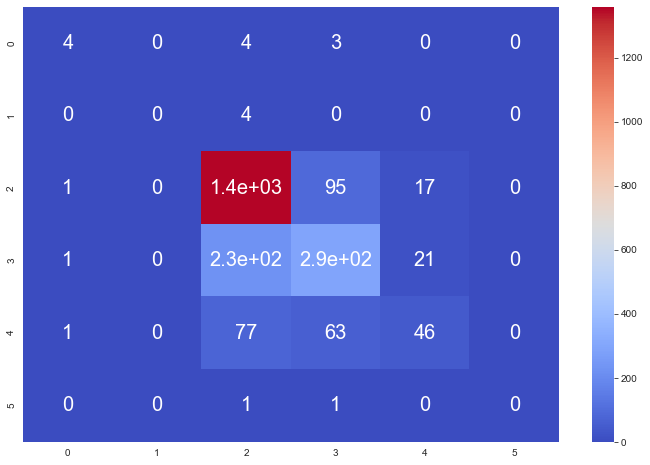



Training score : 0.9323


Test Score : 0.7669


K-fold accuracy : 0.7704


Standard Deviation of Accuracies in k-fold : 0.0076


Classification report : 

              precision    recall  f1-score   support

           0       0.57      0.36      0.44        11
           1       0.00      0.00      0.00         4
           2       0.81      0.92      0.86      1471
           3       0.64      0.54      0.59       543
           4       0.55      0.25      0.34       187
           5       0.00      0.00      0.00         2

    accuracy                           0.77      2218
   macro avg       0.43      0.35      0.37      2218
weighted avg       0.75      0.77      0.75      2218



F1 Score : 74.7683331784709


Evaluation Score : 0.7669071235347159







CatBoostClassifier


Confusion matrix : 



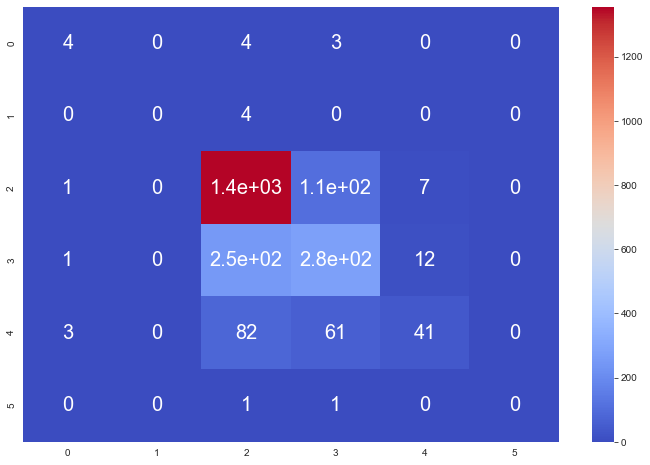



Training score : 0.8888


Test Score : 0.7574


K-fold accuracy : 0.7614


Standard Deviation of Accuracies in k-fold : 0.0019


Classification report : 

              precision    recall  f1-score   support

           0       0.44      0.36      0.40        11
           1       0.00      0.00      0.00         4
           2       0.80      0.92      0.86      1471
           3       0.62      0.52      0.56       543
           4       0.68      0.22      0.33       187
           5       0.00      0.00      0.00         2

    accuracy                           0.76      2218
   macro avg       0.42      0.34      0.36      2218
weighted avg       0.74      0.76      0.74      2218



F1 Score : 73.51289422777688


Evaluation Score : 0.757439134355275







RandomForest


Confusion matrix : 



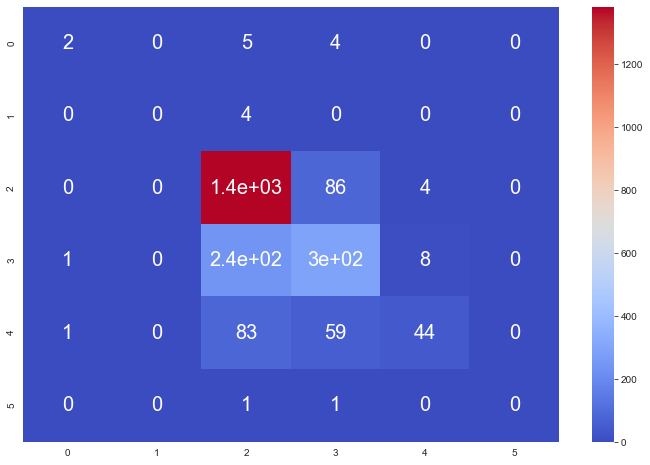



Training score : 0.9975


Test Score : 0.7764


K-fold accuracy : 0.7766


Standard Deviation of Accuracies in k-fold : 0.0083


Classification report : 

              precision    recall  f1-score   support

           0       0.50      0.18      0.27        11
           1       0.00      0.00      0.00         4
           2       0.81      0.94      0.87      1471
           3       0.66      0.54      0.60       543
           4       0.79      0.24      0.36       187
           5       0.00      0.00      0.00         2

    accuracy                           0.78      2218
   macro avg       0.46      0.32      0.35      2218
weighted avg       0.77      0.78      0.75      2218



F1 Score : 75.33596446560564


Evaluation Score : 0.7763751127141569







Extra Tree Classifier


Confusion matrix : 



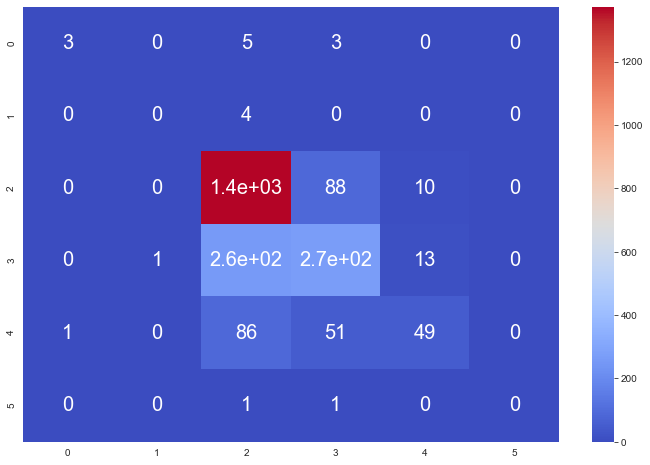



Training score : 0.9975


Test Score : 0.7647


K-fold accuracy : 0.7663


Standard Deviation of Accuracies in k-fold : 0.0076


Classification report : 

              precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.00      0.00      0.00         4
           2       0.80      0.93      0.86      1471
           3       0.65      0.50      0.57       543
           4       0.68      0.26      0.38       187
           5       0.00      0.00      0.00         2

    accuracy                           0.76      2218
   macro avg       0.48      0.33      0.37      2218
weighted avg       0.75      0.76      0.74      2218



F1 Score : 74.2009848687077


Evaluation Score : 0.7646528403967539







Bagging Classifier


Confusion matrix : 



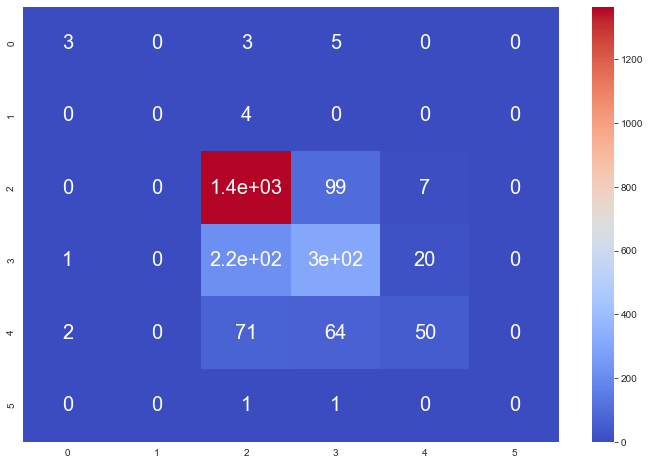



Training score : 0.9975


Test Score : 0.7764


K-fold accuracy : 0.7826


Standard Deviation of Accuracies in k-fold : 0.0121


Classification report : 

              precision    recall  f1-score   support

           0       0.50      0.27      0.35        11
           1       0.00      0.00      0.00         4
           2       0.82      0.93      0.87      1471
           3       0.64      0.56      0.60       543
           4       0.65      0.27      0.38       187
           5       0.00      0.00      0.00         2

    accuracy                           0.78      2218
   macro avg       0.44      0.34      0.37      2218
weighted avg       0.76      0.78      0.76      2218



F1 Score : 75.80905322495126


Evaluation Score : 0.7763751127141569







Gradient Boosting Classifier


Confusion matrix : 



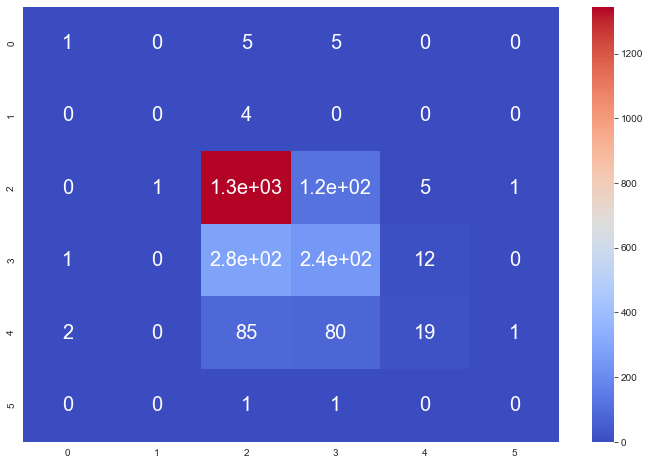



Training score : 0.7847


Test Score : 0.7254


K-fold accuracy : 0.7364


Standard Deviation of Accuracies in k-fold : 0.0033


Classification report : 

              precision    recall  f1-score   support

           0       0.25      0.09      0.13        11
           1       0.00      0.00      0.00         4
           2       0.78      0.91      0.84      1471
           3       0.54      0.45      0.49       543
           4       0.53      0.10      0.17       187
           5       0.00      0.00      0.00         2

    accuracy                           0.73      2218
   macro avg       0.35      0.26      0.27      2218
weighted avg       0.70      0.73      0.69      2218



F1 Score : 69.36798479607307


Evaluation Score : 0.7254283137962128







LightGBM


Confusion matrix : 



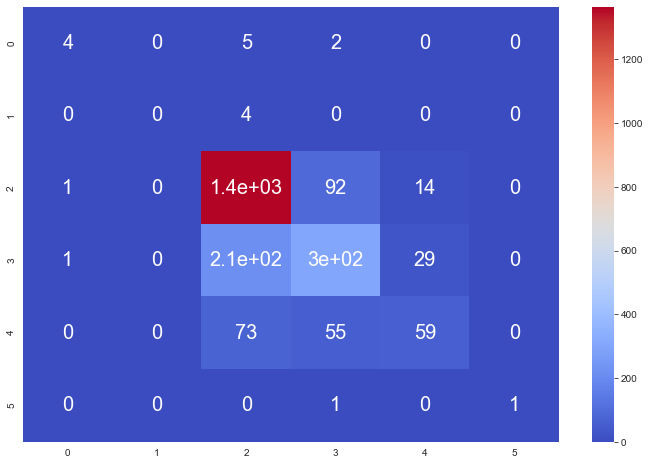



Training score : 0.9678


Test Score : 0.7786


K-fold accuracy : 0.7792


Standard Deviation of Accuracies in k-fold : 0.0037


Classification report : 

              precision    recall  f1-score   support

           0       0.67      0.36      0.47        11
           1       0.00      0.00      0.00         4
           2       0.82      0.93      0.87      1471
           3       0.67      0.55      0.60       543
           4       0.58      0.32      0.41       187
           5       1.00      0.50      0.67         2

    accuracy                           0.78      2218
   macro avg       0.62      0.44      0.50      2218
weighted avg       0.76      0.78      0.76      2218



F1 Score : 76.27857406334516


Evaluation Score : 0.778629395852119







Logistic Regression


Confusion matrix : 



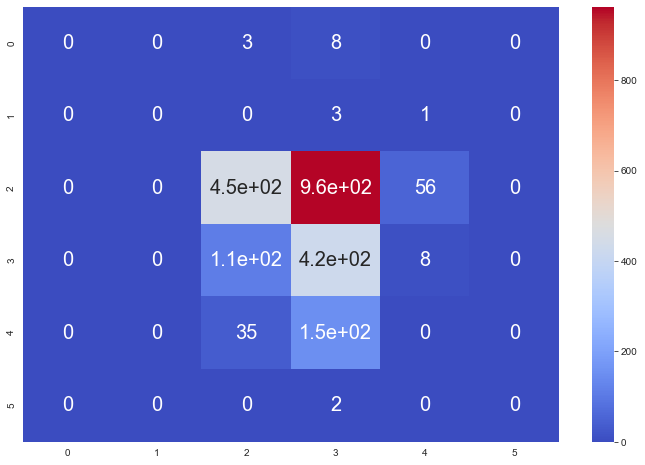



Training score : 0.3964


Test Score : 0.3959


K-fold accuracy : 0.3785


Standard Deviation of Accuracies in k-fold : 0.0164


Classification report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00         4
           2       0.75      0.31      0.44      1471
           3       0.27      0.78      0.41       543
           4       0.00      0.00      0.00       187
           5       0.00      0.00      0.00         2

    accuracy                           0.40      2218
   macro avg       0.17      0.18      0.14      2218
weighted avg       0.57      0.40      0.39      2218



F1 Score : 38.932271933605136


Evaluation Score : 0.3958521190261497





Wall time: 9min 8s


In [110]:
%%time

pre_final = []

for i in models:
    sam = evaluation_metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)

In [111]:
data_pre_final = [x[0] for x in pre_final]

In [112]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "F1 Score" , "Evaluation_Score"])

me.sort_values(by = ["Evaluation_Score" , "F1 Score" , "K-fold Std" , "K-fold Accuracy" , "Test Score" , "Train Score"] , inplace = True , ascending = [False , False , True , False , False , False])
me = me.reset_index(drop = True)
me

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,F1 Score,Evaluation_Score
0,LightGBM,0.967764,0.778629,0.779193,0.003684,76.278574,0.778629
1,Bagging Classifier,0.997520,0.776375,0.782574,0.012138,75.809053,0.776375
2,RandomForest,0.997520,0.776375,0.776600,0.008303,75.335964,0.776375
3,XGBClassifier,0.932259,0.766907,0.770400,0.007619,74.768333,0.766907
4,Extra Tree Classifier,0.997520,0.764653,0.766343,0.007578,74.200985,0.764653
5,CatBoostClassifier,0.888751,0.757439,0.761384,0.001870,73.512894,0.757439
6,Gradient Boosting Classifier,0.784716,0.725428,0.736361,0.003341,69.367985,0.725428
7,Logistic Regression,0.396416,0.395852,0.378491,0.016431,38.932272,0.395852


In [75]:
def feature_importance(model , X_train , y_train):
    features = model.feature_importances_
    temp = pd.DataFrame(list(zip(features , X_train.columns)) , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)
    plt.figure(figsize = (15 , 50))
    sns.set(font_scale = 1)
    sns.barplot(data = temp , y = "Feartures" , x = "Feature Importances")
    plt.show()
    return temp

In [113]:
cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=6,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.07,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1,
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
cat.fit(X_train, y_train, verbose=50,
        use_best_model=True,
        eval_set=[(X_train, y_train),(X_test, y_test)],
        plot=False)

0:	learn: 0.6943192	test: 0.6943192	test1: 0.6825969	best: 0.6825969 (0)	total: 30.8ms	remaining: 30.8s
50:	learn: 0.7352344	test: 0.7352344	test1: 0.7037872	best: 0.7042381 (46)	total: 970ms	remaining: 18.1s
100:	learn: 0.7577773	test: 0.7577773	test1: 0.7137060	best: 0.7146078 (97)	total: 1.92s	remaining: 17.1s
150:	learn: 0.7699504	test: 0.7699504	test1: 0.7209197	best: 0.7218215 (135)	total: 2.83s	remaining: 15.9s
200:	learn: 0.7852795	test: 0.7852795	test1: 0.7267809	best: 0.7267809 (181)	total: 3.73s	remaining: 14.8s
250:	learn: 0.7959874	test: 0.7959874	test1: 0.7326420	best: 0.7326420 (250)	total: 4.63s	remaining: 13.8s
300:	learn: 0.8077096	test: 0.8077096	test1: 0.7362489	best: 0.7376014 (288)	total: 5.54s	remaining: 12.9s
350:	learn: 0.8172904	test: 0.8172904	test1: 0.7398557	best: 0.7398557 (349)	total: 6.45s	remaining: 11.9s
400:	learn: 0.8286745	test: 0.8286745	test1: 0.7425609	best: 0.7430117 (367)	total: 7.36s	remaining: 11s
450:	learn: 0.8380298	test: 0.8380298	test1: 

In [100]:
from sklearn.model_selection import StratifiedKFold

errbag = []
y_pred_totbag = []

fold = StratifiedKFold(n_splits = 10, shuffle = True , random_state = 42)

for train_index, test_index in fold.split(X , y):
    X_tr, X_te = X.loc[train_index], X.loc[test_index]
    y_tr, y_te = y[train_index], y[test_index]
    

    bag = BaggingClassifier(random_state = 42 , n_estimators = 200)
    bag.fit(X_tr , y_tr)
    
    y_pred_bag = bag.predict(X_te)
    print("Accuracy: ", accuracy_score(y_te,y_pred_bag))

    errbag.append(accuracy_score(y_te,y_pred_bag))
    p = bag.predict(tt)
    y_pred_totbag.append(p)

Accuracy:  0.806131650135257
Accuracy:  0.7889990982867449
Accuracy:  0.7790802524797115
Accuracy:  0.7962128043282236
Accuracy:  0.7899008115419297
Accuracy:  0.8142470694319206
Accuracy:  0.8232642019837692
Accuracy:  0.8169522091974752
Accuracy:  0.799819657348963
Accuracy:  0.7908025247971145


In [101]:
np.mean(errbag,0)

0.8005410279531109

In [102]:
bag_preds = np.mean(y_pred_totbag,0).round().astype(int)
bag_preds

array([2, 2, 2, ..., 3, 2, 4])

In [103]:
bag_preds = lb.inverse_transform(bag_preds)
bag_preds

array(['30 minutes', '30 minutes', '30 minutes', ..., '45 minutes',
       '30 minutes', '65 minutes'], dtype=object)

In [104]:
bag_final = pd.DataFrame({"Delivery_Time" : bag_preds})
bag_final

,Delivery_Time
0,30 minutes
1,30 minutes
2,30 minutes
3,30 minutes
4,30 minutes
...,...
2769,30 minutes
2770,30 minutes
2771,45 minutes
2772,30 minutes


In [105]:
bag_final["Delivery_Time"].value_counts()

30 minutes     2052
45 minutes      603
65 minutes      114
120 minutes       4
80 minutes        1
Name: Delivery_Time, dtype: int64

In [106]:
bag_final.to_csv("Bagging_2.csv" , index = False)

In [123]:
errlgbm = []
y_pred_totlgbm = []

fold = StratifiedKFold(n_splits = 10, shuffle = True , random_state = 42)

for train_index, test_index in fold.split(X , y):
    X_tr, X_te = X.loc[train_index], X.loc[test_index]
    y_tr, y_te = y[train_index], y[test_index]
    

    lgbm = LGBMClassifier(random_state = 42 , n_estimators = 300 , boosting_type='gbdt' , objective = "multiclass")
    lgbm.fit(X_tr , y_tr)
    
    y_pred_lgbm = lgbm.predict(X_te)
    print("Accuracy: ", accuracy_score(y_te,y_pred_lgbm))

    errlgbm.append(accuracy_score(y_te,y_pred_lgbm))
    p = lgbm.predict(tt)
    y_pred_totlgbm.append(p)

Accuracy:  0.7989179440937781
Accuracy:  0.7980162308385933
Accuracy:  0.7745716862037872
Accuracy:  0.7908025247971145
Accuracy:  0.7790802524797115
Accuracy:  0.8160504959422904
Accuracy:  0.8160504959422904
Accuracy:  0.8106402164111812
Accuracy:  0.7917042380522994
Accuracy:  0.7826871055004508


In [124]:
np.mean(errlgbm,0)

0.7958521190261497

In [125]:
lgbm_preds = np.mean(y_pred_totlgbm,0).round().astype(int)
lgbm_preds

array([2, 2, 2, ..., 3, 4, 4])

In [126]:
lgbm_preds = lb.inverse_transform(lgbm_preds)
lgbm_preds

array(['30 minutes', '30 minutes', '30 minutes', ..., '45 minutes',
       '65 minutes', '65 minutes'], dtype=object)

In [127]:
lgbm_final = pd.DataFrame({"Delivery_Time" : lgbm_preds})
lgbm_final

,Delivery_Time
0,30 minutes
1,30 minutes
2,30 minutes
3,30 minutes
4,30 minutes
...,...
2769,30 minutes
2770,30 minutes
2771,45 minutes
2772,65 minutes


In [128]:
lgbm_final["Delivery_Time"].value_counts()

30 minutes     2050
45 minutes      602
65 minutes      112
120 minutes       6
20 minutes        4
Name: Delivery_Time, dtype: int64

In [129]:
lgbm_final.to_csv("LGBM_1.csv" , index = False)